<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:##6adeb0;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="padding: 10px;color:black"><center>CSE 310 Artificial Intelligence and Machine Learning</center> </h1>
<h2 style="padding: 10px;color:black"><center>CA-4 REVIEW</center> </h2>
</div>

# Problem Statement

#### The given problem statement was to develop and evaluate a machine learning model for 3d skeleton-based recognition using the UTD MHAD dataset.

#### Train/Test Split Criteria: Odd subjects (S1, S3, S5, S7) for Training and the rest (S2, S4, S6, S8) for testing.  

#### Feature: Euclidean distance Distance feature (distance between corresponding joints from consecutive frames as shown in the below Fig.)


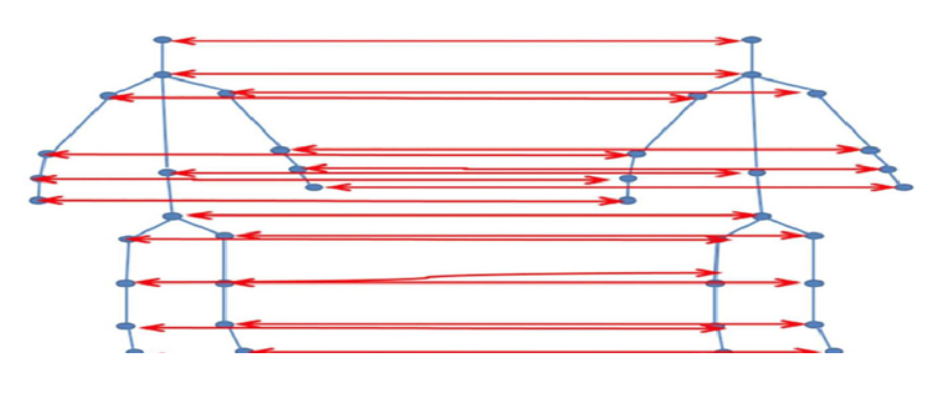

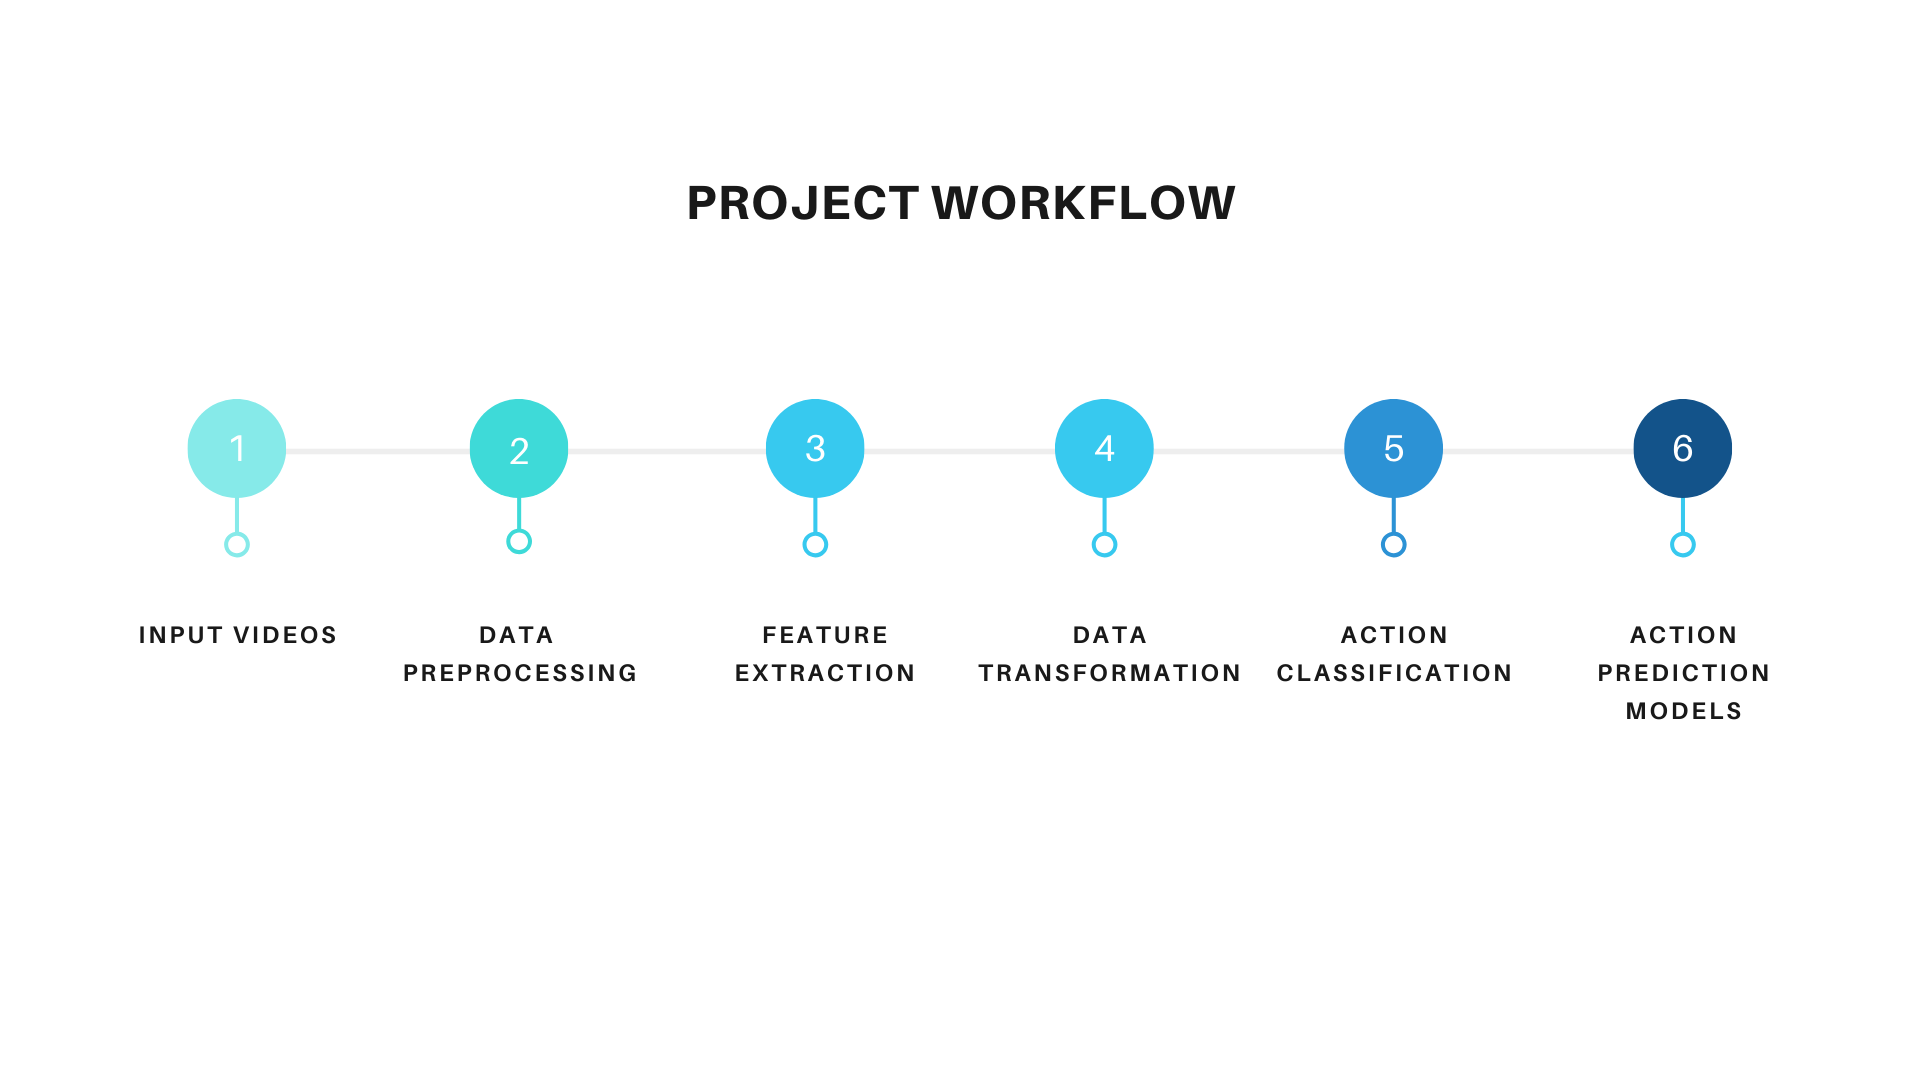

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.io import loadmat

In [3]:
path = path = "G:/College/III Year/AI & ML/Skeleton/"
files = os.listdir(path)

# Importing the dataset

In [4]:
def findFrames(file):
    action_dict = loadmat("G:/College/III Year/AI & ML/Skeleton/"+file)
    action = action_dict["d_skel"]
    return action.shape[2]

## Frame extraction 
<h4> To find min and max frames in the skeleton dataset</h4>

In [5]:
frames = []
for file in files:
    if(file.endswith(".mat")) :
        frame = findFrames(file)
        frames.append(frame)

# frames.pop()
    
min_frame_count = min(frames)
min_frame_file = files[frames.index(min_frame_count)]

max_frame_count = max(frames)
max_frame_file = files[frames.index(max_frame_count)]

print("Maximum:")
print(max_frame_file)
print(max_frame_count)
print("Minimum:")
print(min_frame_file)
print(min_frame_count)

Maximum:
a21_s8_t2_skeleton.mat
125
Minimum:
a20_s4_t3_skeleton.mat
41


In [6]:
def findData(file):
     action_dict = loadmat("G:/College/III Year/AI & ML/Skeleton/"+file)
     action = action_dict["d_skel"]
     return action

## Splitting of train data (S1 S3 S5 S7) and  test data (S2 S4 S6 S8)

In [7]:
trainData=[]#Odd files for train set
testData=[]#Even files for test set
for file in files:
    if file.endswith('.mat'):
        if "s1" in file or "s3" in file or "s5" in file or "s7" in file:
               trainData.append(file)
        else:
               testData.append(file) 

In [8]:
len(trainData)

431

In [9]:
len(testData)

430

We have 431 mat files in our training data and 430 in the test set 

In [10]:
train_features=[]
for tr in trainData:
     if(tr.endswith(".mat")) :
        frame = findData(tr)
        train_features.append(frame)
    

In [11]:
test_features=[]
for tr in testData:
     if(tr.endswith(".mat")) :
        frame = findData(tr)
        test_features.append(frame)


In [12]:
# Data points in 1st action pertaining to head joint of x coordinates
train_features[0][0][0]

array([-0.12486531, -0.12481832, -0.1247704 , -0.12465207, -0.12454364,
       -0.12450068, -0.12449139, -0.12431762, -0.12420736, -0.12432688,
       -0.12465432, -0.12516634, -0.12574475, -0.12671459, -0.12755606,
       -0.12830889, -0.12933321, -0.13052076, -0.13238466, -0.1343767 ,
       -0.13767815, -0.1420504 , -0.14734674, -0.1511818 , -0.15343311,
       -0.15482283, -0.15318839, -0.14623635, -0.14578636, -0.14552988,
       -0.14124767, -0.1376235 , -0.13508834, -0.13348685, -0.13300653,
       -0.13320152, -0.13432918, -0.13665183, -0.13932747, -0.1418806 ,
       -0.14397776, -0.14588919, -0.14740358, -0.14845097, -0.14920036,
       -0.14976852, -0.15020891, -0.15053165, -0.15081222, -0.15104987,
       -0.15137985, -0.15162618, -0.15181266, -0.15199225, -0.15214419,
       -0.15232065, -0.1524902 , -0.15273142, -0.15297617, -0.15318814,
       -0.15342432, -0.15367314, -0.15381658, -0.15383793, -0.15370142,
       -0.15353657, -0.15334265, -0.15278035, -0.15226005, -0.15

<div style="background-color:pink; padding:1rem 1rem">
<h3>Dimension of the data features</h3>
</div>

In [13]:
train_features[0].shape

(20, 3, 76)

In [14]:
train_features[0].shape[0]

20

In [15]:
train_features[0][0]

array([[-0.12486531, -0.12481832, -0.1247704 , -0.12465207, -0.12454364,
        -0.12450068, -0.12449139, -0.12431762, -0.12420736, -0.12432688,
        -0.12465432, -0.12516634, -0.12574475, -0.12671459, -0.12755606,
        -0.12830889, -0.12933321, -0.13052076, -0.13238466, -0.1343767 ,
        -0.13767815, -0.1420504 , -0.14734674, -0.1511818 , -0.15343311,
        -0.15482283, -0.15318839, -0.14623635, -0.14578636, -0.14552988,
        -0.14124767, -0.1376235 , -0.13508834, -0.13348685, -0.13300653,
        -0.13320152, -0.13432918, -0.13665183, -0.13932747, -0.1418806 ,
        -0.14397776, -0.14588919, -0.14740358, -0.14845097, -0.14920036,
        -0.14976852, -0.15020891, -0.15053165, -0.15081222, -0.15104987,
        -0.15137985, -0.15162618, -0.15181266, -0.15199225, -0.15214419,
        -0.15232065, -0.1524902 , -0.15273142, -0.15297617, -0.15318814,
        -0.15342432, -0.15367314, -0.15381658, -0.15383793, -0.15370142,
        -0.15353657, -0.15334265, -0.15278035, -0.1

# Computation of Euclidean distance between 2 frames

### Euclidean distance



$d(\mathbf {p,q})= \sqrt{\sum \limits_{i=1}^n (q_i-p_i)^2}$

- p,q	=	two points in Euclidean n-space
- q_i, p_i	=	Euclidean vectors, starting from the origin of the space (initial point)
- n	=	n-space


 <div style="background-color:pink; padding:1rem 1rem">
    <h3>Euclidean distance for training data S1,S3,S5,S7</h3>
 </div>

In [51]:
a = []
squared = 0
b = []
euclidean_distance = []
for m in range(len(train_features)):
    for k in range(train_features[0].shape[0]):
        for j in range(40):
            for i in train_features[m][k]:
                a.append(i[j])
                b.append(i[j+1])
for i in range(0,len(a),3):
    squared += (a[i]-b[i])**2+(a[i+1]-b[i+1])**2+(a[i+2]-b[i+2])**2
    euclidean_distance.append(np.sqrt(squared))


In [17]:
euclidean_distance

[0.00018459734721678375,
 0.00024121722954177757,
 0.0008912194052305162,
 0.0011904898660102822,
 0.0013953070323244696,
 0.0015377123920697544,
 0.0024698576494676426,
 0.0030404309674501775,
 0.003462902830456048,
 0.0038676678960906053,
 0.004612679120620932,
 0.005045034324483998,
 0.0056059667381089745,
 0.005954147044411172,
 0.0062497333981436694,
 0.006439609956587266,
 0.0066112315456829576,
 0.006920787420795103,
 0.0072275089184219155,
 0.007955064391485042,
 0.009181517724476678,
 0.011048670011238456,
 0.01208281455865912,
 0.012585094569155516,
 0.012955646925099821,
 0.013455979104599369,
 0.015675113993136345,
 0.015799962383717597,
 0.01594615654879433,
 0.016693691660056482,
 0.017175925943043607,
 0.017404020019984926,
 0.01749634006481653,
 0.017514085554486632,
 0.017531520445955604,
 0.017586592917947882,
 0.01779279294195586,
 0.01802468962321615,
 0.018228976992063474,
 0.018359420696487046,
 0.018359650537757895,
 0.01836000973729904,
 0.018361393945700244,
 0

In [18]:
len(euclidean_distance)

344800

 <div style="background-color:pink; padding:1rem 1rem">
<h3>Euclidean distance for test data S2,S4,S6,S8</h3>
</div>

In [19]:
a = []
squared = 0
b = []
euclidean_test_distance = []
for m in range(len(test_features)):
    for k in range(test_features[0].shape[0]):
        for j in range(40):
            for i in test_features[m][k]:
                a.append(i[j])
                b.append(i[j+1])
for i in range(0,len(a),3):
    squared += (a[i]-b[i])**2+(a[i+1]-b[i+1])**2+(a[i+2]-b[i+2])**2
    euclidean_test_distance.append(np.sqrt(squared))


In [20]:
euclidean_test_distance

[0.00030899949985275924,
 0.00045465734823832394,
 0.0006808401643058908,
 0.0008557314456277127,
 0.0020945984222609537,
 0.004158718919447632,
 0.006238513999440581,
 0.011567010035451459,
 0.01384430353532396,
 0.016883527371898324,
 0.018289645537045957,
 0.01930771959241362,
 0.020168633682745536,
 0.020559156752411135,
 0.021118292794339008,
 0.021376054626047886,
 0.02160168908094058,
 0.021720753365056498,
 0.021796170076447796,
 0.02629463392652238,
 0.026596782625700616,
 0.02669737358800361,
 0.02678662358726014,
 0.02684922679544887,
 0.02689204750501464,
 0.02691706283523861,
 0.02693509280018545,
 0.026946141351234118,
 0.026952418307405454,
 0.026956259754354034,
 0.026958230353734777,
 0.026959274244358022,
 0.026960232702416532,
 0.026961677806122242,
 0.026963228239084258,
 0.026964118891846005,
 0.026964925845470646,
 0.02696572708991916,
 0.026969152951052053,
 0.026981330704219132,
 0.026981582151749364,
 0.026981769538456532,
 0.026981954694323292,
 0.026982111785

In [21]:
len(euclidean_test_distance)

344000

# Reshaping the 1D array of distance to matrix

- The euclidean_distance array consists of all the temporal euclidean distances calculated between the frames. 
- For 20 joints we have fixed 40 distance values  (20 x 40) 
- Hence the array is reshaped to the dimension 431 rows x 800 columns

In [22]:
train_array= np.reshape(euclidean_distance,(431,800))
train_array

array([[1.84597347e-04, 2.41217230e-04, 8.91219405e-04, ...,
        8.85940052e-01, 8.85940095e-01, 8.85940136e-01],
       [8.85941652e-01, 8.85944000e-01, 8.85946107e-01, ...,
        1.37772182e+00, 1.37772183e+00, 1.37772187e+00],
       [1.37772192e+00, 1.37772199e+00, 1.37772202e+00, ...,
        1.72641708e+00, 1.72641708e+00, 1.72641708e+00],
       ...,
       [2.23605718e+01, 2.23605718e+01, 2.23605718e+01, ...,
        2.23983746e+01, 2.23983754e+01, 2.23983758e+01],
       [2.23983758e+01, 2.23983758e+01, 2.23983758e+01, ...,
        2.24309925e+01, 2.24309925e+01, 2.24309925e+01],
       [2.24309925e+01, 2.24309925e+01, 2.24309926e+01, ...,
        2.24682746e+01, 2.24682876e+01, 2.24682879e+01]])

In [23]:
test_array = np.reshape(euclidean_test_distance,(430,800))
test_array

array([[3.08999500e-04, 4.54657348e-04, 6.80840164e-04, ...,
        7.13684927e-01, 7.13696514e-01, 7.13702473e-01],
       [7.13702577e-01, 7.13702650e-01, 7.13702693e-01, ...,
        1.04113003e+00, 1.04117608e+00, 1.04118806e+00],
       [1.04118806e+00, 1.04118807e+00, 1.04118807e+00, ...,
        1.33329797e+00, 1.33330343e+00, 1.33330494e+00],
       ...,
       [2.23294429e+01, 2.23294429e+01, 2.23294429e+01, ...,
        2.23432704e+01, 2.23432704e+01, 2.23432704e+01],
       [2.23432704e+01, 2.23432704e+01, 2.23432704e+01, ...,
        2.23562081e+01, 2.23562081e+01, 2.23562081e+01],
       [2.23562081e+01, 2.23562081e+01, 2.23562081e+01, ...,
        2.23707622e+01, 2.23707622e+01, 2.23707622e+01]])

# Dataframe transformation

In [24]:
feature_data = pd.DataFrame(train_array)
feature_data

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.000185,0.000241,0.000891,0.001190,0.001395,0.001538,0.002470,0.003040,0.003463,0.003868,...,0.885939,0.885940,0.885940,0.885940,0.885940,0.885940,0.885940,0.885940,0.885940,0.885940
1,0.885942,0.885944,0.885946,0.885948,0.885951,0.885953,0.885954,0.885956,0.885959,0.885962,...,1.377718,1.377721,1.377722,1.377722,1.377722,1.377722,1.377722,1.377722,1.377722,1.377722
2,1.377722,1.377722,1.377722,1.377722,1.377722,1.377722,1.377723,1.377724,1.377725,1.377735,...,1.726417,1.726417,1.726417,1.726417,1.726417,1.726417,1.726417,1.726417,1.726417,1.726417
3,1.726417,1.726418,1.726418,1.726418,1.726418,1.726418,1.726421,1.726425,1.726429,1.726432,...,2.020174,2.020174,2.020174,2.020174,2.020174,2.020174,2.020174,2.020175,2.020175,2.020175
4,2.020175,2.020175,2.020175,2.020175,2.020175,2.020175,2.020175,2.020175,2.020176,2.020176,...,2.190820,2.190820,2.190820,2.190820,2.190820,2.190820,2.190821,2.190821,2.190823,2.190823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,22.306483,22.306483,22.306483,22.306483,22.306483,22.306483,22.306483,22.306483,22.306483,22.306483,...,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043
427,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,...,22.360508,22.360533,22.360533,22.360540,22.360547,22.360553,22.360555,22.360558,22.360562,22.360572
428,22.360572,22.360572,22.360572,22.360572,22.360572,22.360572,22.360572,22.360572,22.360572,22.360572,...,22.398365,22.398366,22.398367,22.398372,22.398373,22.398374,22.398375,22.398375,22.398375,22.398376
429,22.398376,22.398376,22.398376,22.398376,22.398376,22.398376,22.398376,22.398376,22.398376,22.398376,...,22.430986,22.430987,22.430988,22.430988,22.430989,22.430991,22.430992,22.430992,22.430993,22.430993


In [25]:
feature_test=pd.DataFrame(test_array)
feature_test

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.000309,0.000455,0.000681,0.000856,0.002095,0.004159,0.006239,0.011567,0.013844,0.016884,...,0.713671,0.713676,0.713679,0.713679,0.713680,0.713681,0.713684,0.713685,0.713697,0.713702
1,0.713703,0.713703,0.713703,0.713703,0.713703,0.713704,0.713705,0.713710,0.713717,0.713728,...,1.041004,1.041059,1.041104,1.041105,1.041114,1.041119,1.041124,1.041130,1.041176,1.041188
2,1.041188,1.041188,1.041188,1.041188,1.041262,1.041306,1.041329,1.041353,1.041362,1.041374,...,1.333269,1.333271,1.333273,1.333273,1.333291,1.333297,1.333297,1.333298,1.333303,1.333305
3,1.333305,1.333305,1.333305,1.333305,1.333305,1.333308,1.333318,1.333336,1.333351,1.333367,...,1.521214,1.521214,1.521249,1.521254,1.521256,1.521257,1.521280,1.521289,1.521289,1.521313
4,1.521313,1.521313,1.521313,1.521313,1.521313,1.521314,1.521314,1.521314,1.521314,1.521316,...,1.794111,1.794113,1.794146,1.794146,1.794146,1.794146,1.794146,1.794149,1.794150,1.794150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,22.304475,22.304475,22.304475,22.304475,22.304475,22.304475,22.304475,22.304475,22.304475,22.304475,...,22.315215,22.315215,22.315215,22.315215,22.315215,22.315215,22.315215,22.315215,22.315216,22.315216
426,22.315216,22.315216,22.315216,22.315216,22.315216,22.315216,22.315216,22.315216,22.315216,22.315216,...,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443
427,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,...,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270
428,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,...,22.356208,22.356208,22.356208,22.356208,22.356208,22.356208,22.356208,22.356208,22.356208,22.356208


# Action classification

In [26]:
for action in trainData:
       print(action)

a10_s1_t1_skeleton.mat
a10_s1_t2_skeleton.mat
a10_s1_t3_skeleton.mat
a10_s1_t4_skeleton.mat
a10_s3_t1_skeleton.mat
a10_s3_t2_skeleton.mat
a10_s3_t3_skeleton.mat
a10_s3_t4_skeleton.mat
a10_s5_t1_skeleton.mat
a10_s5_t2_skeleton.mat
a10_s5_t3_skeleton.mat
a10_s5_t4_skeleton.mat
a10_s7_t1_skeleton.mat
a10_s7_t2_skeleton.mat
a10_s7_t3_skeleton.mat
a10_s7_t4_skeleton.mat
a11_s1_t1_skeleton.mat
a11_s1_t2_skeleton.mat
a11_s1_t3_skeleton.mat
a11_s1_t4_skeleton.mat
a11_s3_t1_skeleton.mat
a11_s3_t2_skeleton.mat
a11_s3_t3_skeleton.mat
a11_s3_t4_skeleton.mat
a11_s5_t1_skeleton.mat
a11_s5_t2_skeleton.mat
a11_s5_t3_skeleton.mat
a11_s5_t4_skeleton.mat
a11_s7_t1_skeleton.mat
a11_s7_t2_skeleton.mat
a11_s7_t3_skeleton.mat
a11_s7_t4_skeleton.mat
a12_s1_t1_skeleton.mat
a12_s1_t2_skeleton.mat
a12_s1_t3_skeleton.mat
a12_s1_t4_skeleton.mat
a12_s3_t1_skeleton.mat
a12_s3_t2_skeleton.mat
a12_s3_t3_skeleton.mat
a12_s3_t4_skeleton.mat
a12_s5_t1_skeleton.mat
a12_s5_t2_skeleton.mat
a12_s5_t3_skeleton.mat
a12_s5_t4_s

In [27]:
action_train = []
for i in trainData:
    action_train.append(i.split('_')[0])
feature_data["action"] = action_train

In [28]:
action_train

['a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',


In [29]:
feature_data

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,action
0,0.000185,0.000241,0.000891,0.001190,0.001395,0.001538,0.002470,0.003040,0.003463,0.003868,...,0.885940,0.885940,0.885940,0.885940,0.885940,0.885940,0.885940,0.885940,0.885940,a10
1,0.885942,0.885944,0.885946,0.885948,0.885951,0.885953,0.885954,0.885956,0.885959,0.885962,...,1.377721,1.377722,1.377722,1.377722,1.377722,1.377722,1.377722,1.377722,1.377722,a10
2,1.377722,1.377722,1.377722,1.377722,1.377722,1.377722,1.377723,1.377724,1.377725,1.377735,...,1.726417,1.726417,1.726417,1.726417,1.726417,1.726417,1.726417,1.726417,1.726417,a10
3,1.726417,1.726418,1.726418,1.726418,1.726418,1.726418,1.726421,1.726425,1.726429,1.726432,...,2.020174,2.020174,2.020174,2.020174,2.020174,2.020174,2.020175,2.020175,2.020175,a10
4,2.020175,2.020175,2.020175,2.020175,2.020175,2.020175,2.020175,2.020175,2.020176,2.020176,...,2.190820,2.190820,2.190820,2.190820,2.190820,2.190821,2.190821,2.190823,2.190823,a10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,22.306483,22.306483,22.306483,22.306483,22.306483,22.306483,22.306483,22.306483,22.306483,22.306483,...,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,a9
427,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,22.315043,...,22.360533,22.360533,22.360540,22.360547,22.360553,22.360555,22.360558,22.360562,22.360572,a9
428,22.360572,22.360572,22.360572,22.360572,22.360572,22.360572,22.360572,22.360572,22.360572,22.360572,...,22.398366,22.398367,22.398372,22.398373,22.398374,22.398375,22.398375,22.398375,22.398376,a9
429,22.398376,22.398376,22.398376,22.398376,22.398376,22.398376,22.398376,22.398376,22.398376,22.398376,...,22.430987,22.430988,22.430988,22.430989,22.430991,22.430992,22.430992,22.430993,22.430993,a9


In [30]:
action_test = []
for i in testData:
    action_test.append(i.split('_')[0])
feature_test["action"] = action_test

In [31]:
action_test

['a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a10',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a11',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a12',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a13',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a14',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a15',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a16',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',
 'a17',


In [32]:
feature_test

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,action
0,0.000309,0.000455,0.000681,0.000856,0.002095,0.004159,0.006239,0.011567,0.013844,0.016884,...,0.713676,0.713679,0.713679,0.713680,0.713681,0.713684,0.713685,0.713697,0.713702,a10
1,0.713703,0.713703,0.713703,0.713703,0.713703,0.713704,0.713705,0.713710,0.713717,0.713728,...,1.041059,1.041104,1.041105,1.041114,1.041119,1.041124,1.041130,1.041176,1.041188,a10
2,1.041188,1.041188,1.041188,1.041188,1.041262,1.041306,1.041329,1.041353,1.041362,1.041374,...,1.333271,1.333273,1.333273,1.333291,1.333297,1.333297,1.333298,1.333303,1.333305,a10
3,1.333305,1.333305,1.333305,1.333305,1.333305,1.333308,1.333318,1.333336,1.333351,1.333367,...,1.521214,1.521249,1.521254,1.521256,1.521257,1.521280,1.521289,1.521289,1.521313,a10
4,1.521313,1.521313,1.521313,1.521313,1.521313,1.521314,1.521314,1.521314,1.521314,1.521316,...,1.794113,1.794146,1.794146,1.794146,1.794146,1.794146,1.794149,1.794150,1.794150,a10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,22.304475,22.304475,22.304475,22.304475,22.304475,22.304475,22.304475,22.304475,22.304475,22.304475,...,22.315215,22.315215,22.315215,22.315215,22.315215,22.315215,22.315215,22.315216,22.315216,a9
426,22.315216,22.315216,22.315216,22.315216,22.315216,22.315216,22.315216,22.315216,22.315216,22.315216,...,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,a9
427,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,22.329443,...,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,a9
428,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,22.343270,...,22.356208,22.356208,22.356208,22.356208,22.356208,22.356208,22.356208,22.356208,22.356208,a9


# Modelling the train and test data

In [33]:
# Training data split into X and y
X_train = feature_data.iloc[:,:-1].values
y_train = feature_data.iloc[:,-1].values

In [34]:
# Test data split into X and y
X_test = feature_test.iloc[:,:-1].values
y_test = feature_test.iloc[:,-1].values

In [35]:
#taking care of missing data:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Columns: 801 entries, 0 to action
dtypes: float64(800), object(1)
memory usage: 2.6+ MB


# Comparison of classification models and prediction of action

 <div style="background-color:pink; padding:1rem 1rem">
    <h3>K-nearest neighbour Classification</h3>
    </div>

- knn is a classification algorithm
- knn works by finding the most similar data points in the training data and attempt to make a educated guess based on their classification

In [36]:
from sklearn.neighbors import KNeighborsClassifier as knn
classifier = knn(n_neighbors=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [37]:
y_pred = classifier.predict(X_test)
y_pred

array(['a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10',
       'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10',
       'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a11', 'a11',
       'a11', 'a11', 'a11', 'a11', 'a11', 'a11', 'a11', 'a11', 'a12',
       'a12', 'a12', 'a12', 'a12', 'a12', 'a12', 'a12', 'a12', 'a12',
       'a12', 'a12', 'a13', 'a13', 'a13', 'a13', 'a13', 'a13', 'a13',
       'a13', 'a13', 'a13', 'a13', 'a14', 'a14', 'a14', 'a14', 'a14',
       'a14', 'a14', 'a14', 'a14', 'a14', 'a14', 'a14', 'a14', 'a14',
       'a15', 'a15', 'a15', 'a15', 'a15', 'a15', 'a15', 'a15', 'a15',
       'a15', 'a15', 'a15', 'a16', 'a16', 'a16', 'a16', 'a16', 'a16',
       'a16', 'a16', 'a16', 'a16', 'a17', 'a17', 'a17', 'a17', 'a17',
       'a17', 'a17', 'a17', 'a17', 'a17', 'a17', 'a17', 'a17', 'a17',
       'a17', 'a17', 'a17', 'a17', 'a17', 'a17', 'a17', 'a18', 'a18',
       'a18', 'a18', 'a18', 'a18', 'a18', 'a19', 'a19', 'a19', 'a19',
       'a19', 'a1', 

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
print("Accuracy score: ",round(acc,2))

Accuracy score:  0.43


 <div style="background-color:pink; padding:1rem 1rem">
    <h3>Xgboost </h3>
  </div>
  
- XGBoost is an implementation of Gradient Boosted decision trees. 
- Weights play an important role in XGBoost. 
- Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.
- These individual classifiers/predictors then ensemble to give a strong and more precise model.

In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
ypred_xgboost = xgb.predict(X_test)
ypred_xgboost

array(['a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10',
       'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a10',
       'a10', 'a10', 'a10', 'a10', 'a10', 'a10', 'a11', 'a11', 'a11',
       'a11', 'a11', 'a11', 'a11', 'a11', 'a11', 'a11', 'a11', 'a12',
       'a12', 'a12', 'a12', 'a12', 'a12', 'a12', 'a12', 'a12', 'a12',
       'a12', 'a12', 'a13', 'a13', 'a13', 'a13', 'a13', 'a13', 'a13',
       'a13', 'a13', 'a13', 'a14', 'a14', 'a14', 'a14', 'a14', 'a14',
       'a14', 'a14', 'a14', 'a14', 'a14', 'a14', 'a14', 'a14', 'a14',
       'a15', 'a15', 'a15', 'a15', 'a15', 'a15', 'a15', 'a15', 'a15',
       'a15', 'a15', 'a15', 'a16', 'a16', 'a16', 'a16', 'a16', 'a16',
       'a16', 'a16', 'a16', 'a16', 'a17', 'a17', 'a17', 'a17', 'a17',
       'a17', 'a17', 'a17', 'a17', 'a17', 'a17', 'a17', 'a17', 'a17',
       'a17', 'a17', 'a17', 'a17', 'a17', 'a17', 'a17', 'a18', 'a18',
       'a18', 'a18', 'a18', 'a18', 'a18', 'a18', 'a19', 'a19', 'a19',
       'a19', 'a1', 

In [41]:
acc = accuracy_score(y_test,ypred_xgboost)
print("Accuracy score: ",round(acc,2)*100)

Accuracy score:  44.0


<AxesSubplot:>

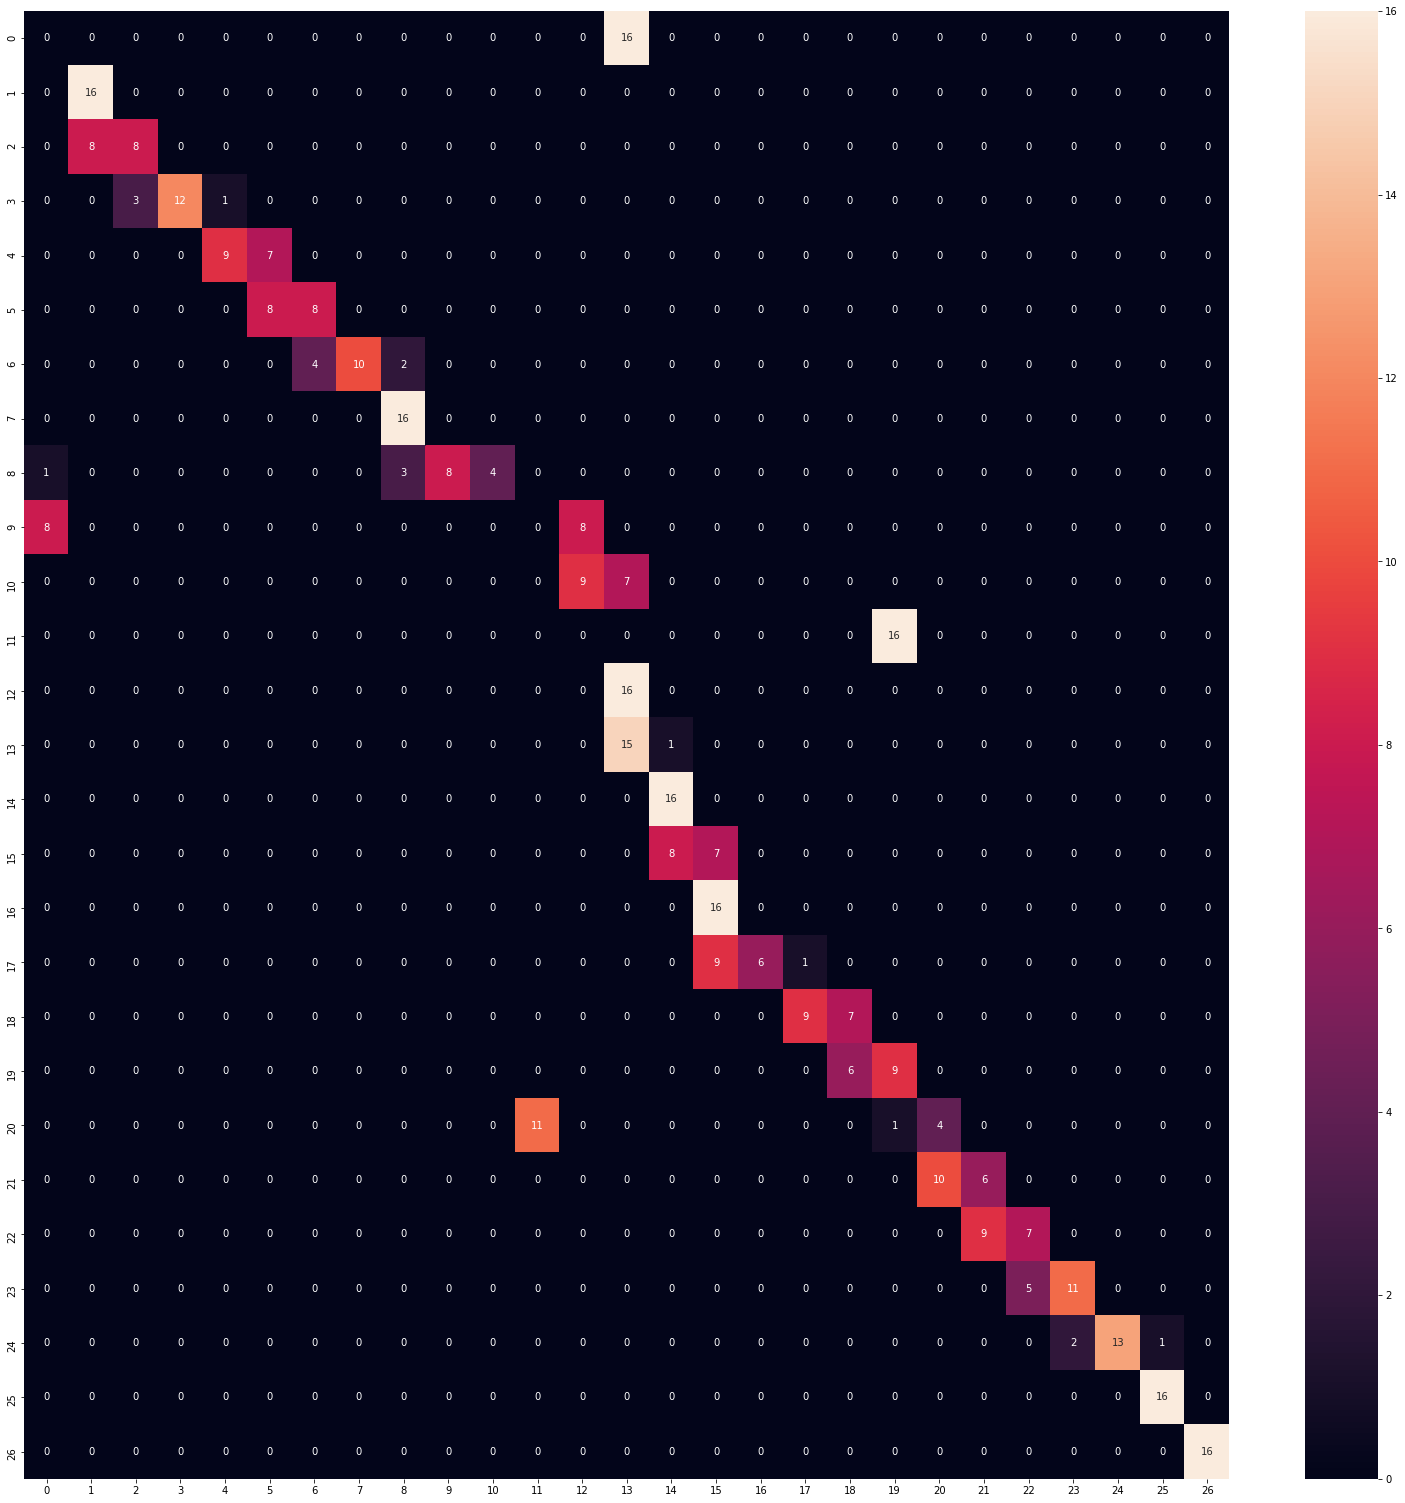

In [42]:
plt.figure(figsize = (27,27))
sns.heatmap(confusion_matrix(y_test,ypred_xgboost),annot=True)

# Ensemble learning
- Ensemble learning is the process by which multiple models, such as classifiers, are strategically generated and combined to solve a particular computational intelligence problem. 
- It is primarily used to improve the (classification, prediction, etc.) performance of a model, or reduce the likelihood of an unfortunate selection of a poor one.
- Ensembles are used to achieve better predictive performance on a predictive modeling problem than a single predictive model. The way this is achieved can be understood as the model reducing the variance component of the prediction error by adding bias


In [43]:
from sklearn import tree
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression(solver="newton-cg")

In [44]:
# All 3 models are fitted with training data 
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(solver='newton-cg')

In [45]:
# All 3 models predictions with test data
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

In [46]:
final_pred = np.array([])

In [47]:
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, statistics.mode([pred1[i], pred2[i], pred3[i]]))

### Voting Classifier
The idea of using a voting classifier is instead of creating separate dedicated models and finding the accuracy for each of them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

In [48]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1,solver="newton-cg")
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
print("Accuracy :", round(score,3)*100)

D:\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


Accuracy : 54.0


By using an ensemble model we reduce the spread or dispersion of the predictions and model performance. The ensemble has given a better accuracy compared to the  predictions we compared in the single contributing models with approximately 54% score accuracy.

 <div style="background-color:#6adeb0; padding:1rem 1rem">
    <h3>CONCLUSION</h3>
    </div>
    
- From this analysis of features we were able to develop, evaluate and compare machine learning models for 3d skeleton-based recognition using the UTD MHAD dataset.
- We observe from the different models that ensemble provides a better accuracy rate compared to other ML models like KNN, Logistic Regression, decision tree , XGBoost etc.


<div style="background-color:beige;padding:1rem 1rem">
    <h2 style="text-align:center">THANK YOU</h2>
</div>